In [1]:
import torch
import torch.nn as nn

import torchvision.transforms as transforms
import torchvision.datasets as dsets

import matplotlib.pyplot as plt
import numpy as np

In [2]:
train_dataset = dsets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
validation_dataset = dsets.MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())

In [3]:
print('train dataset :', len(train_dataset), '\nvalidation dataset :', len(validation_dataset))

train dataset : 60000 
validation dataset : 10000


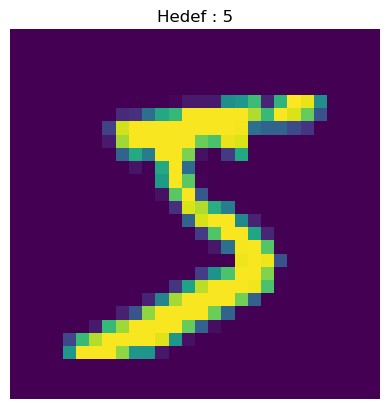

In [4]:
plt.imshow(train_dataset[0][0].numpy().transpose(1, 2, 0))
plt.title('Hedef : {}'.format(train_dataset[0][1]))
plt.axis('off')
plt.show()

In [5]:
train_dataset[0][0].numpy().shape

(1, 28, 28)

In [6]:
train_dataset[0][0].numpy().transpose(1,2,0).shape           # transpose un içinde yazan 0 = 1, 1 = 28 ve 2 = 28 'i temsil etmektedir.

(28, 28, 1)

In [7]:
class SoftMax(nn.Module):
  def __init__(self, input_size, output_size):
    super(SoftMax, self).__init__()

    self.linear = nn.Linear(input_size, output_size)

  def forward(self,x):
    out = self.linear(x)
    return out

In [8]:
input_dim = 28*28
output_dim = 10
model = SoftMax(input_dim, output_dim)
list(model.parameters())

[Parameter containing:
 tensor([[ 0.0165,  0.0027,  0.0061,  ...,  0.0105, -0.0064,  0.0032],
         [ 0.0239,  0.0329, -0.0191,  ...,  0.0329, -0.0292,  0.0152],
         [ 0.0323, -0.0279,  0.0222,  ..., -0.0116,  0.0309, -0.0213],
         ...,
         [ 0.0309, -0.0223,  0.0276,  ...,  0.0012,  0.0340,  0.0016],
         [-0.0109,  0.0083,  0.0010,  ..., -0.0261, -0.0064, -0.0283],
         [-0.0056,  0.0313,  0.0330,  ...,  0.0146, -0.0327, -0.0115]],
        requires_grad=True),
 Parameter containing:
 tensor([-0.0042, -0.0056, -0.0168,  0.0039, -0.0042,  0.0275, -0.0203,  0.0200,
          0.0168,  0.0067], requires_grad=True)]

In [9]:
print('shape of w : ', model.state_dict()['linear.weight'].shape, '\nshape of b : ', model.state_dict()['linear.bias'].shape)

shape of w :  torch.Size([10, 784]) 
shape of b :  torch.Size([10])


In [10]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.001)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=1000)
validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset, batch_size=5000)

In [11]:
n_epochs = 100
accuracy_list = []

for epoch in range(n_epochs):

  print('Epoch {}'.format(epoch), '-----------------------------------------------------')
  
  for x, y in train_loader:

    z = model(x.view(-1, 28*28))
    loss = criterion(z,y)
    print('loss : ', loss.item())

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  
  correct = 0
  for x_test, y_test in validation_dataset:
    
    z_test = model(x_test.view(-1, 28*28))
    _, zhat_test = torch.max(z_test, 1)

    correct = correct + (zhat_test == y_test).sum().item()

  accuracy = correct / len(validation_dataset)
  accuracy_list.append(accuracy)

Epoch 0 -----------------------------------------------------
loss :  2.338085651397705
loss :  2.343076467514038
loss :  2.3264355659484863
loss :  2.3289380073547363
loss :  2.3329226970672607
loss :  2.3327596187591553
loss :  2.319988489151001
loss :  2.32453989982605
loss :  2.3297958374023438
loss :  2.331450939178467
loss :  2.3227951526641846
loss :  2.3263473510742188
loss :  2.315901041030884
loss :  2.325953960418701
loss :  2.3115367889404297
loss :  2.3143458366394043
loss :  2.311190605163574
loss :  2.326093912124634
loss :  2.3215439319610596
loss :  2.2897093296051025
loss :  2.3244199752807617
loss :  2.295793294906616
loss :  2.3163537979125977
loss :  2.316028118133545
loss :  2.3067753314971924
loss :  2.305692434310913
loss :  2.2884602546691895
loss :  2.296478748321533
loss :  2.3021233081817627
loss :  2.296166181564331
loss :  2.3071489334106445
loss :  2.297816514968872
loss :  2.297435998916626
loss :  2.291796922683716
loss :  2.3025858402252197
loss :  2.3

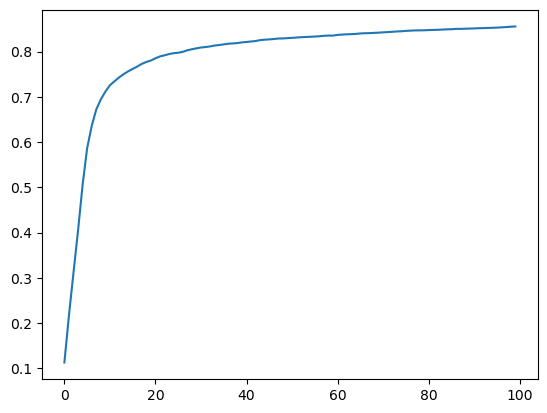

In [12]:
plt.plot([e for e in range(n_epochs)], accuracy_list)
plt.show()

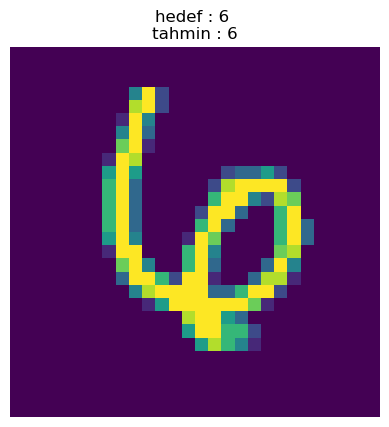

In [13]:
data = validation_dataset[22]

plt.imshow(data[0].numpy().transpose(1,2,0))
plt.title('hedef : {} \ntahmin : {}'.format(data[1], torch.max(model(data[0].view(-1,28*28)),1)[1].item()))
plt.axis('off')
plt.show()

In [14]:
torch.cuda.is_available()

False

In [15]:
torch.version.cuda

'11.7'